# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import requests
import json
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "./output_data/cities.csv"
output_data_file = "citiesA.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)  #cities is a list of city names

# Print the city count to confirm sufficient count
len(cities)


616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# for i in range(0, 3):
#         print(cities[i])

In [8]:
column_names = ['City','Cloudiness','Country',
                'Date','Humidity','Lat','Lng',
                'Max Temp','Wind Speed']

weather = []

print('Beginning Data Retrieval')
print("------------------------------")\
for i in range(0, 100):
    url="http://api.openweathermap.org/data/2.5/weather?q="+cities[i]+"&appid=283a9319d8bc008a581bb0b88d702293"
    #print(url)
    
    try: 
        response = requests.get(url).json()
        #print(f"Processing data for {response['name']} \t \t city number: {response['id']}")
        print("Processing Record \033[36m {0}\033[0m of Set \033[36m {1} \033[0m | {2}".format(i, i, cities[i]))
#     weather.append([response['id'], response['name'], response['clouds']['all'], 
#                     response['sys']['country'], 
#                     response['dt'], response['main']['humidity'], response['coord']['lat'], 
#                     response['coord']['lon'], response['main']['temp_max'], 
#                     response['wind']['speed']])
    
        weather.append([response['name'], response['clouds']['all'], 
                    response['sys']['country'], 
                    response['dt'], response['main']['humidity'], response['coord']['lat'], 
                    response['coord']['lon'], response['main']['temp_max'], 
                    response['wind']['speed']])
    except:
        print('City \033[1m not \033[0m found. Skipping...')
# for row in weather:
#     print(row)

df = pd.DataFrame(weather, columns=column_names)
df


Processing Record  0 of Set  0  | say
Processing Record  1 of Set  1  | hasaki
Processing Record  2 of Set  2  | hobart
Processing Record  3 of Set  3  | kapaa
Processing Record  4 of Set  4  | ushuaia
Processing Record  5 of Set  5  | albany
Processing Record  6 of Set  6  | moose factory
Processing Record  7 of Set  7  | palmer
Processing Record  8 of Set  8  | jamestown
Processing Record  9 of Set  9  | lebu
Processing Record  10 of Set  10  | longyearbyen
Processing Record  11 of Set  11  | guerrero negro
Processing Record  12 of Set  12  | komsomolskiy
Processing Record  13 of Set  13  | cayenne
Processing Record  14 of Set  14  | rikitea
Processing Record  15 of Set  15  | puerto ayora
Processing Record  16 of Set  16  | hovd
Processing Record  17 of Set  17  | bluff
Processing Record  18 of Set  18  | kaitangata
Processing Record  19 of Set  19  | ixtapa
Processing Record  20 of Set  20  | samusu
City  not  found. Skipping...
Processing Record  21 of Set  21  | santarem
Processi

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Say,0,NE,1583783339,4,13.10,2.37,309.15,2.60
1,Hasaki,75,JP,1583783339,100,35.73,140.83,285.37,3.60
2,Hobart,75,AU,1583783267,87,-42.88,147.33,282.15,1.00
3,Kapaa,90,US,1583783339,73,22.08,-159.32,296.15,6.20
4,Ushuaia,75,AR,1583783339,66,-54.80,-68.30,284.15,5.10
...,...,...,...,...,...,...,...,...,...
89,Saint-Pierre,1,RE,1583783355,94,-21.34,55.48,298.15,12.30
90,Port Alfred,100,ZA,1583783355,96,-33.59,26.89,293.15,1.34
91,Butaritari,58,KI,1583783345,80,3.07,172.79,302.34,9.01
92,Atuona,0,PF,1583783355,62,-9.80,-139.03,300.72,5.93


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
df.to_csv (output_data_file, header=True)  
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Say,0,NE,1583783339,4,13.10,2.37,309.15,2.60
1,Hasaki,75,JP,1583783339,100,35.73,140.83,285.37,3.60
2,Hobart,75,AU,1583783267,87,-42.88,147.33,282.15,1.00
3,Kapaa,90,US,1583783339,73,22.08,-159.32,296.15,6.20
4,Ushuaia,75,AR,1583783339,66,-54.80,-68.30,284.15,5.10
...,...,...,...,...,...,...,...,...,...
89,Saint-Pierre,1,RE,1583783355,94,-21.34,55.48,298.15,12.30
90,Port Alfred,100,ZA,1583783355,96,-33.59,26.89,293.15,1.34
91,Butaritari,58,KI,1583783345,80,3.07,172.79,302.34,9.01
92,Atuona,0,PF,1583783355,62,-9.80,-139.03,300.72,5.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

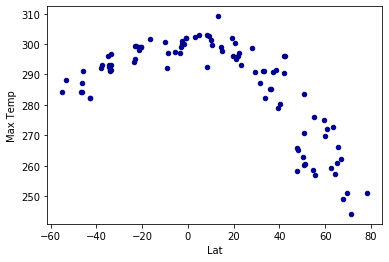

In [10]:
ax1 = df.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='DarkBlue')

#### Latitude vs. Humidity Plot

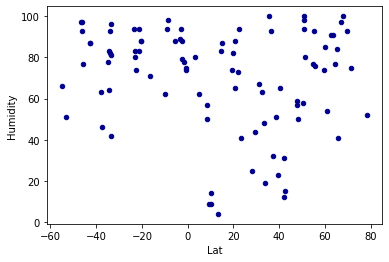

In [11]:
ax1 = df.plot.scatter(x='Lat',
                      y='Humidity',
                      c='DarkBlue')

#### Latitude vs. Cloudiness Plot

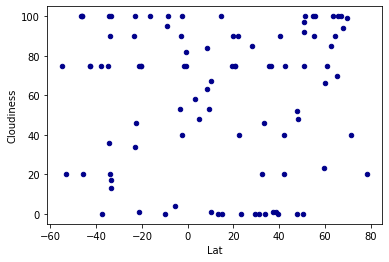

In [12]:
ax1 = df.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='DarkBlue')

#### Latitude vs. Wind Speed Plot

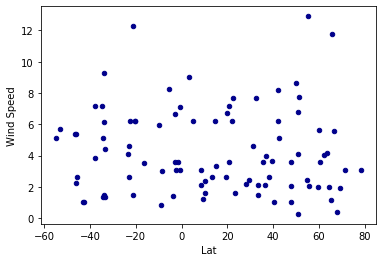

In [13]:
ax1 = df.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='DarkBlue')

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimenn
# Use sci pi to the the pearson r measure of correlation (r value)

def plot_linear_regression(x_values, y_values, x_label, y_label):
    #correlation = st.pearsonr(x_values, y_values)
    # Pretty print the results
    
    # Do a line regression on x and y values to calculate values for the line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    print('The correlation between ' + x_label + 
      '\033[1m and \033[0m' +
      'the ' + y_label +
      '\033[1m is \033[0m' + 
       f'\033[36m {rvalue:2.2f} \033[0m')
    
    print('The r-squared' + '\033[1m is \033[0m' + f'\033[36m {rvalue:2.6f} \033[0m')



    # Create a scatter plot of weight versus average tumor volume
    plt.scatter(x_values,y_values)
    # Add a red line to indicate the correlation
    plt.plot(x_values,regress_values,"r-")
    # Create labels for the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(x_label+" Versus "+ y_label)

    # Show the plot
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat'] > 0] 
southern_df = df[df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and the Latitude is  -0.90 
The r-squared is  -0.900400 


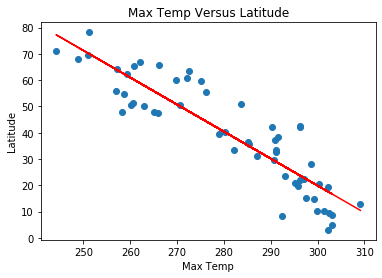

In [19]:
plot_linear_regression(northern_df['Max Temp'], northern_df['Lat'], "Max Temp", "Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and the Latitude is  0.83 
The r-squared is  0.832489 


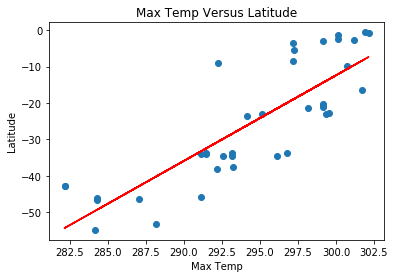

In [20]:
plot_linear_regression(southern_df['Max Temp'], southern_df['Lat'], "Max Temp", "Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
northern_df.columns

The correlation between Humidity and the Latitude is  0.35 
The r-squared is  0.353185 


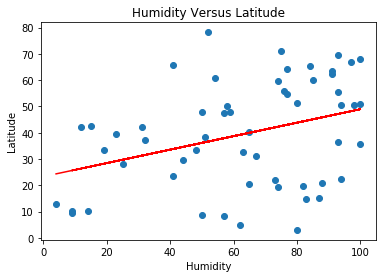

In [21]:
plot_linear_regression(northern_df['Humidity'], northern_df['Lat'], "Humidity", "Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity and the Latitude is  0.20 
The r-squared is  0.197876 


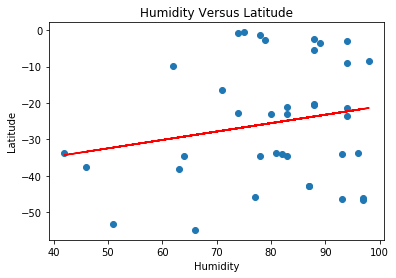

In [22]:
plot_linear_regression(southern_df['Humidity'], southern_df['Lat'], "Humidity", "Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness and the Latitude is  0.25 
The r-squared is  0.253744 


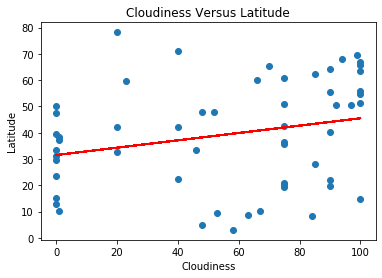

In [23]:
plot_linear_regression(northern_df['Cloudiness'], northern_df['Lat'], "Cloudiness", "Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness and the Latitude is  0.05 
The r-squared is  0.049257 


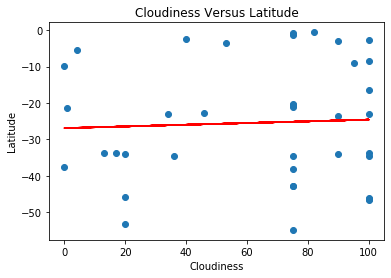

In [24]:
plot_linear_regression(southern_df['Cloudiness'], southern_df['Lat'], "Cloudiness", "Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed and the Latitude is  -0.02 
The r-squared is  -0.015019 


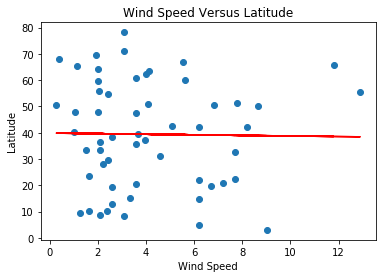

In [25]:
plot_linear_regression(northern_df['Wind Speed'], northern_df['Lat'], "Wind Speed", "Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed and the Latitude is  0.04 
The r-squared is  0.042334 


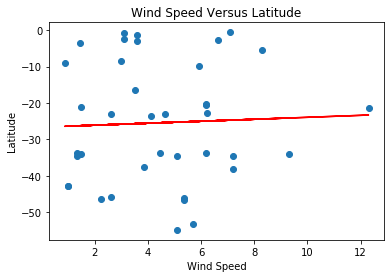

In [26]:
plot_linear_regression(southern_df['Wind Speed'], southern_df['Lat'], "Wind Speed", "Latitude")